# Assignment - Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

### Download Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" sections on the Kaggle competition page carefully
- Make sure to download the `kaggle.json` file from your [Kaggle account](https://kaggle.com/me/account) and upload it on Colab

In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
import os

In [ ]:
IS_KAGGLE = 'KAGGLE_KERNEL_RUN_TYPE' in os.environ

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [ ]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 47.7MB/s]


In [ ]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


In [ ]:
train_fname = 'data/train.tsv.zip'
test_fname = 'data/test.tsv.zip'
sub_fname = 'data/sampleSubmission.csv'

### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
raw_df = pd.read_csv(train_fname, sep='\t')

In [ ]:
raw_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
raw_df.shape

(156060, 4)

In [ ]:
raw_df.Phrase.sample(10).values

array(['also reminds us of our own responsibility to question what is told as the truth',
       'with a humanistic message', 'households',
       "sustain the buoyant energy level of the film 's city beginnings into its country conclusion '",
       'The stripped-down dramatic constructs , austere imagery and',
       "It 's mildly interesting to ponder the peculiar American style of justice that plays out here , but it 's so muddled and derivative that few will bother thinking it all through",
       ', like me , think an action film disguised as a war tribute is disgusting to begin with',
       'the mix',
       'is offensive , puerile and unimaginatively foul-mouthed if it was at least funny',
       'self-assured'], dtype=object)

In [ ]:
test_df = pd.read_csv(test_fname, sep='\t')

In [ ]:
test_df.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [ ]:
sub_df = pd.read_csv(sub_fname)

In [ ]:
sub_df.head()

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


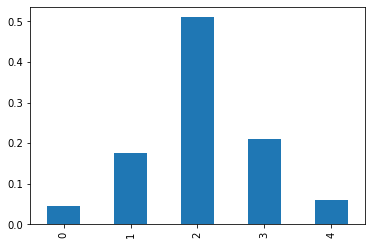

In [ ]:
raw_df.Sentiment.value_counts(normalize=True).sort_index().plot(kind='bar')

In [ ]:
noOfWord = pd.Series([len(sent.split(' ')) for sent in raw_df.Phrase])

In [ ]:
#Avg. number of words in a sentence
np.sum(noOfWord)//len(noOfWord)

7

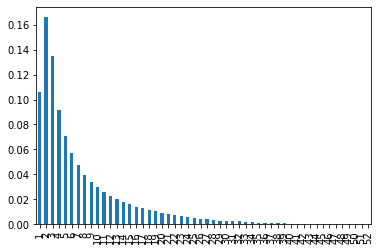

In [ ]:
#Distribution of number of words in a sentence 
noOfWord.value_counts(normalize=True).sort_index().plot(kind='bar')

In [ ]:
raw_df.SentenceId

0            1
1            1
2            1
3            1
4            1
          ... 
156055    8544
156056    8544
156057    8544
156058    8544
156059    8544
Name: SentenceId, Length: 156060, dtype: int64

Summarize your insights and learnings from the dataset below:

* Sentiments follow a normal distribution where 50% of the sentiments are 2(Neutral), 20-25% of the sentiments are 1 and 3(somewhat negative/positive) and 0 and 4(negative and positive) are less than 5%.
* Maximum number of words in a sentence is 2 and its a positived skewed distribution(more the number of words in a sentence less the chance of finding it)
* Their are 8544 sentences where each Sentence has been parsed into many phrases

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
stemmer = SnowballStemmer("english")

In [ ]:
eng_stopwords = stopwords.words('english')

In [ ]:
', '.join(eng_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
custom_stopwords = eng_stopwords[:115]

In [ ]:
def tokenize(text):
  return [stemmer.stem(tok) for tok in word_tokenize(text) if tok.isalpha()]

In [ ]:
vectorizer = TfidfVectorizer(tokenizer=tokenize,
                             stop_words=custom_stopwords,
                             ngram_range=(1, 2),
                             max_features=2500)

In [ ]:
vectorizer.fit(raw_df.Phrase)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=2500, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7f8509020700>)

In [ ]:
len(vectorizer.vocabulary_)

2500

In [ ]:
vectorizer.get_feature_names_out()[:100]

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'academi', 'accent', 'accept', 'access',
       'accomplish', 'account', 'accur', 'ach', 'achiev', 'across', 'act',
       'action', 'action film', 'action flick', 'action movi',
       'action sequenc', 'actor', 'actress', 'actual', 'ad', 'adam',
       'adam sandler', 'adapt', 'add', 'addit', 'address', 'adequ',
       'admir', 'admit', 'adolesc', 'adult', 'advantag', 'adventur',
       'affair', 'affect', 'affirm', 'afraid', 'age', 'aggress', 'ago',
       'ahead', 'aid', 'aim', 'aimless', 'air', 'album', 'alien', 'aliv',
       'allen', 'allow', 'almost', 'almost everi', 'alon', 'along',
       'alreadi', 'also', 'altern', 'although', 'alway', 'amateurish',
       'amaz', 'ambigu', 'ambit', 'ambiti', 'america', 'american', 'ami',
       'among', 'amount', 'amus', 'analyz', 'anderson', 'angel', 'angl',
       'angst', 'anguish', 'ani', 'ani movi', 'anim', 'ann', 'annoy',
       'anoth'

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [ ]:
raw_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
inputs = vectorizer.transform(raw_df.Phrase)

In [ ]:
inputs.shape

(156060, 2500)

In [ ]:
inputs.toarray()[0][:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27620188,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
raw_df.Phrase[0]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [ ]:
len(raw_df.Phrase[0].split(' '))

37

In [ ]:
s = pd.Series(inputs.toarray()[0])

In [ ]:
index = list(s[s!=0].index)
index

[64, 77, 78, 538, 926, 1416, 1464, 1495, 1902, 2084]

In [ ]:
vectorizer.get_feature_names_out()[index]

array(['also', 'amount', 'amus', 'demonstr', 'good', 'much', 'none',
       'occasion', 'seri', 'stori'], dtype=object)

In [ ]:
len(index)

10

In [ ]:
test_input = vectorizer.transform(test_df.Phrase)

In [ ]:
test_input.shape

(66292, 2500)

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set

As their are multiple phrases belong to the same sentences and so are not independent from each other. Using random sample can result in validation set being similar to that of training set which is not desirable.

In [ ]:
np.unique(raw_df.SentenceId)

array([   1,    2,    3, ..., 8542, 8543, 8544])

In [ ]:
TRAIN_SIZE = raw_df[raw_df.SentenceId==6500].index[0]

In [ ]:
TRAIN_SIZE

121354

In [ ]:
train_inputs = inputs[:TRAIN_SIZE]
train_targets = raw_df.Sentiment[:TRAIN_SIZE]

In [ ]:
train_inputs.shape, train_targets.shape

((121354, 2500), (121354,))

In [ ]:
val_inputs = inputs[TRAIN_SIZE:]
val_targets = raw_df.Sentiment[TRAIN_SIZE:]

In [ ]:
val_inputs.shape, val_targets.shape

((34706, 2500), (34706,))

### Train Logistic Regression Model



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
import time

In [ ]:
start = time.time()
model.fit(train_inputs, train_targets)
end = time.time()
dur = end - start
dur

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


13.078202247619629

In [ ]:
duration = {'Logistic Regression': dur}

In [ ]:
train_preds = model.predict(train_inputs)

In [ ]:
train_targets

0         1
1         2
2         2
3         2
4         2
         ..
121349    3
121350    3
121351    3
121352    3
121353    2
Name: Sentiment, Length: 121354, dtype: int64

In [ ]:
train_preds

array([3, 2, 2, ..., 3, 3, 2])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
train_score = accuracy_score(train_targets, train_preds)
train_score

0.6421131565502579

In [ ]:
val_preds = model.predict(val_inputs)

In [ ]:
val_score = accuracy_score(val_targets, val_preds)
val_score

0.5823776868552988

In [ ]:
score = {'Logistic Regression': [train_score, val_score]}

### Study Predictions on Sample Inputs

In [ ]:
small_df = raw_df.sample(20)

In [ ]:
small_df

,PhraseId,SentenceId,Phrase,Sentiment
29325,29326,1359,enough to make you wish Jacquot had left well ...,1
131775,131776,7103,too eager,2
18634,18635,818,the end of the movie,2
48886,48887,2387,rough-hewn vanity project,1
93243,93244,4862,Not quite as miraculous as its DreamWorks make...,1
20909,20910,932,from history,2
84289,84290,4356,The April 2002 instalment of the American War ...,1
36241,36242,1712,is revealing,2
104399,104400,5508,great team,3
145996,145997,7940,", depends if you believe that the shocking con...",2


In [ ]:
small_inputs = vectorizer.transform(small_df.Phrase)

In [ ]:
small_inputs.shape

(20, 2500)

In [ ]:
small_preds = model.predict(small_inputs)

In [ ]:
small_preds

array([1, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 3, 2, 4, 2, 2, 2, 4, 1, 2])

### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score 



In [ ]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [ ]:
test_preds = model.predict(test_input)

In [ ]:
test_preds

array([2, 2, 2, ..., 2, 2, 1])

In [ ]:
sub_df.head()

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


In [ ]:
sub_df.Sentiment = test_preds

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [ ]:
sub_df.to_csv('submission.csv', index=None)

In [ ]:
!head submission.csv

PhraseId,Sentiment
156061,2
156062,2
156063,2
156064,2
156065,2
156066,3
156067,3
156068,2
156069,3


####Finetuning the Model

In [ ]:
def test_param(modelName, param_name, param_values, **params):
  val_errors = [] 
  for value in param_values:
    newparams = {param_name: value}
    for para in params:
      newparams[para] = params[para]
    model = modelName(random_state=23, **newparams)
    model.fit(train_inputs, train_targets)
    val_preds = model.predict(val_inputs)
    val_score = accuracy_score(val_preds, val_targets)
    val_errors.append(val_score)
  return val_errors

In [ ]:
test_param(LogisticRegression, 'class_weight', ['balanced', None])

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.4847288653258803, 0.5823776868552988]

In [ ]:
test_param(LogisticRegression, 'solver', ['lbfgs', 'newton-cg', 'sag', 'saga'])

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.5823776868552988,
 0.5826946349334409,
 0.5826946349334409,
 0.5826946349334409]

In [ ]:
test_param(LogisticRegression, 'max_iter', [15, 20, 25, 35, 100], solver='sag')

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[0.5823776868552988,
 0.5827810753183887,
 0.5826946349334409,
 0.5826946349334409,
 0.5826946349334409]

In [ ]:
impLogisticReg = LogisticRegression(random_state=23,
                                    max_iter=20,
                                    solver='sag')

In [ ]:
def get_score(model):
  start = time.time()
  model.fit(train_inputs, train_targets)
  end = time.time()
  dur = end - start
  train_preds = model.predict(train_inputs)
  val_preds = model.predict(val_inputs)

  train_score = accuracy_score(train_preds, train_targets)
  val_score = accuracy_score(val_preds, val_targets)
  return train_score, val_score, dur

In [ ]:
train_score1, val_score1, dur= get_score(impLogisticReg)
train_score1, val_score1    

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(0.6428465481154308, 0.5827810753183887)

In [ ]:
score['Imp Logistic Regression'] = [train_score1, val_score1]

In [ ]:
score

{'Logistic Regression': [0.6421131565502579, 0.5823776868552988],
 'Imp Logistic Regression': [0.6428465481154308, 0.5827810753183887]}

In [ ]:
duration['Imp Logistic Regression'] = dur

In [ ]:
duration

{'Logistic Regression': 12.692826747894287,
 'Imp Logistic Regression': 2.080724000930786}

## Train & Finetune Different ML Models

Train & finetune at least 2 other types of models

Models to try:
- Decision Trees
- Random Forests
- Gradient Boosting
- Naive Bayes
- SVM

Optional: 
* Use PCA for dimensionality reduction
* Compare classification vs regression models


Tips: 

- If using a regression model, make sure to round predictions to integer and clip to the range `[1,5]`
- Track your progress in a copy of [this experiment tracking spreadsheet](https://docs.google.com/spreadsheets/d/1X-tifxAOAYeIA2J32hBGP5B0MPnZy_o-zOz1NbS-1Ig/edit?usp=sharing)


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
train_score1, val_score1, dur = get_score(tree)
train_score1, val_score1, dur

(0.7976663315589103, 0.5379761424537544, 19.950376510620117)

In [ ]:
score['Decision Tree'] = [train_score1, val_score1]

In [ ]:
score

{'Logistic Regression': [0.6421131565502579, 0.5823776868552988],
 'Imp Logistic Regression': [0.6428465481154308, 0.5827810753183887],
 'Decision Tree': [0.7976663315589103, 0.5379761424537544]}

In [ ]:
duration['Decision Tree'] = dur

In [ ]:
duration

{'Logistic Regression': 13.61655592918396,
 'Imp Logistic Regression': 2.236541748046875,
 'Decision Tree': 19.950376510620117}

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier()

In [ ]:
train_score1, val_score1, dur = get_score(forest)
train_score1, val_score1, dur

(0.7976663315589103, 0.56506079640408, 744.1395840644836)

In [ ]:
score['Random Forest'] = [train_score1, val_score1]

In [ ]:
score

{'Logistic Regression': [0.6421131565502579, 0.5823776868552988],
 'Imp Logistic Regression': [0.6428465481154308, 0.5827810753183887],
 'Decision Tree': [0.7976663315589103, 0.5379761424537544],
 'Random Forest': [0.7976663315589103, 0.56506079640408]}

In [ ]:
duration['Random Forest'] = dur

In [ ]:
duration

{'Logistic Regression': 13.61655592918396,
 'Imp Logistic Regression': 2.236541748046875,
 'Decision Tree': 19.950376510620117,
 'Random Forest': 744.1395840644836}

### Stochaistic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd = SGDClassifier()

In [ ]:
train_score1, val_score1, dur = get_score(sgd)
train_score1, val_score1, dur

(0.5792310101026749, 0.5418371463147582, 0.7788512706756592)

In [ ]:
score['Stochistic Gradient Descent'] = [train_score1, val_score1]

In [ ]:
score

{'Logistic Regression': [0.6421131565502579, 0.5823776868552988],
 'Imp Logistic Regression': [0.6428465481154308, 0.5827810753183887],
 'Stochistic Gradient Descent': [0.5792310101026749, 0.5418371463147582]}

In [ ]:
duration['Stochistic Gradient Descent'] = dur

In [ ]:
duration

{'Logistic Regression': 12.692826747894287,
 'Imp Logistic Regression': 2.080724000930786,
 'Stochistic Gradient Descent': 0.7788512706756592}

In [ ]:
test_param(SGDClassifier, 'loss', ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'])

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[0.541606638621564,
 0.5356710655218118,
 0.5768455022186365,
 0.44015444015444016,
 0.47645940183253616]

In [ ]:
test_param(SGDClassifier, 'max_iter', [10, 20, 25, 100], loss='modified_huber')

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[0.5759522849075088,
 0.5768455022186365,
 0.5768455022186365,
 0.5768455022186365]

In [ ]:
test_param(SGDClassifier, 'class_weight', ['balanced', None], loss='modified_huber')

[0.5448049328646344, 0.5768455022186365]

In [ ]:
test_param(SGDClassifier, 'eta0', [0.001, 0.0025, 0.005, 0.01, 0.1], learning_rate='constant', loss='modified_huber')

[0.5679421425690082,
 0.5735319541289691,
 0.5760675387541059,
 0.5758370310609117,
 0.5614014867746211]

In [ ]:
test_param(SGDClassifier, 'learning_rate', ['constant', 'optimal', 'invscaling', 'adaptive'], eta0=0.005, loss='modified_huber')

[0.5760675387541059,
 0.5768455022186365,
 0.49392035959200137,
 0.5758946579842102]

In [ ]:
impSgd = SGDClassifier(loss='modified_huber')

In [ ]:
train_score1, val_score1, dur = get_score(impSgd)
train_score1, val_score1, dur

(0.6271898742521879, 0.5772777041433758, 1.0043909549713135)

In [ ]:
score['Improved Stochastic Gradient'] = [train_score1, val_score1]

In [ ]:
duration['Improved Stochastic Gradient'] = dur

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb = MultinomialNB()

In [ ]:
train_score1, val_score1, dur = get_score(nb)
train_score1, val_score1, dur

(0.5877597771808099, 0.5490405117270789, 0.1424257755279541)

In [ ]:
score['Naive Bayes'] = [train_score1, val_score1]

In [ ]:
score

{'Logistic Regression': [0.6421131565502579, 0.5823776868552988],
 'Naive Bayes': [0.5877597771808099, 0.5490405117270789]}

In [ ]:
duration['Naive Bayes'] = dur

In [ ]:
duration

{'Logistic Regression': 12.812931299209595, 'Naive Bayes': 2.928037643432617}

In [ ]:
impv_nb = MultinomialNB(alpha=0, 
                        class_prior=(0.05, 0.2, 0.5, 0.2, 0.05))

In [ ]:
train_score1, val_score1, dur = get_score(impv_nb)
train_score1, val_score1, dur

/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


(0.5950936928325395, 0.5542845617472483, 0.07810091972351074)

In [ ]:
score['Improved Naive Bayes'] = [train_score1, val_score1]

In [ ]:
score

{'Logistic Regression': [0.6421131565502579, 0.5823776868552988],
 'Improved Naive Bayes': [0.5950936928325395, 0.5542845617472483]}

In [ ]:
duration['Improved Naive Bayes'] = dur

In [ ]:
dur

0.07810091972351074

### SVM

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svc = LinearSVC()

In [ ]:
train_score1, val_score1, dur = get_score(svc)
train_score1, val_score1, dur

(0.6390395042602633, 0.5789776983806835, 6.457574844360352)

In [ ]:
score['Support Vector Machine'] = [train_score1, val_score1]

In [ ]:
score

{'Logistic Regression': [0.6421131565502579, 0.5823776868552988],
 'Support Vector Machine': [0.6390395042602633, 0.5789776983806835]}

In [ ]:
duration['Support Vector Machine'] = dur

In [ ]:
duration

{'Logistic Regression': 13.134043455123901,
 'Support Vector Machine': 6.457574844360352}

In [ ]:
test_param(LinearSVC, 'loss', ['hinge', 'squared_hinge'])

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[0.5580014983000058, 0.5789776983806835]

In [ ]:
test_param(LinearSVC, 'dual', [True, False])

[0.5789776983806835, 0.5789488849190342]

In [ ]:
test_param(LinearSVC, 'multi_class', ['ovr', 'crammer_singer'])

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[0.5789776983806835, 0.566184521408402]

In [ ]:
test_param(LinearSVC, 'class_weight', ['balanced', None])

[0.5407422347720855, 0.5789776983806835]

###Linear Regression

In [ ]:
np.unique(train_targets)

array([0, 1, 2, 3, 4])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear = LinearRegression()

In [ ]:
start = time.time()
linear.fit(train_inputs, train_targets)
end = time.time()
dur = end - start
dur

1.0265254974365234

In [ ]:
pred = linear.predict(train_inputs)
pred

array([2.39252359, 2.23949253, 1.65480573, ..., 2.89306963, 2.89306963,
       2.25786783])

In [ ]:
np.min(pred), np.max(pred)

(-0.7137226707545121, 4.744483046050055)

In [ ]:
def cont_to_disc(alist):
  disList = []
  for ele in alist:
    modEle = round(ele)
    if modEle > 4:
      modEle = 4
    elif modEle < 0:
      modEle = 0
    disList.append(modEle)
  return disList

In [ ]:
train_preds = cont_to_disc(pred)

In [ ]:
val_preds = cont_to_disc(linear.predict(val_inputs))

In [ ]:
train_score1 = accuracy_score(train_targets, train_preds)
val_score1 = accuracy_score(val_targets, val_preds)
train_score1, val_score1

(0.6000955881141125, 0.5588082752261857)

In [ ]:
score['Linear Regression'] = [train_score1, val_score1]
duration['Linear Regression'] = dur

###Model Comparison

In [ ]:
score

{'Logistic Regression': [0.6421131565502579, 0.5823776868552988],
 'Imp Logistic Regression': [0.6428465481154308, 0.5827810753183887],
 'Naive Bayes': [0.5877597771808099, 0.5490405117270789],
 'Improved Naive Bayes': [0.5950936928325395, 0.5542845617472483],
 'Decision Tree': [0.7976663315589103, 0.5379761424537544],
 'Random Forest': [0.7976663315589103, 0.56506079640408],
 'Support Vector Machine': [0.6390395042602633, 0.5789776983806835],
 'Stochistic Gradient Descent': [0.5792310101026749, 0.5418371463147582],
 'Improved Stochastic Gradient': [0.6271898742521879, 0.5772777041433758],
 'Linear Regression': [0.6000955881141125, 0.5588082752261857]}

In [ ]:
duration

{'Logistic Regression': 12.812931299209595,
 'Imp Logistic Regression': 2.236541748046875,
 'Naive Bayes': 2.928037643432617,
 'Improved Naive Bayes': 0.07810091972351074,
 'Decision Tree': 19.950376510620117,
 'Random Forest': 744.1395840644836,
 'Support Vector Machine': 6.457574844360352,
 'Stochistic Gradient Descent': 0.7788512706756592,
 'Improved Stochastic Gradient': 1.0043909549713135,
 'Linear Regression': 1.0265254974365234}

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
modelNames = list(score.keys())
modelNames

['Logistic Regression',
 'Imp Logistic Regression',
 'Naive Bayes',
 'Improved Naive Bayes',
 'Decision Tree',
 'Random Forest',
 'Support Vector Machine',
 'Stochistic Gradient Descent',
 'Improved Stochastic Gradient',
 'Linear Regression']

In [ ]:
trainingScores = [ele[0] for ele in score.values()]
trainingScores

[0.6421131565502579,
 0.6428465481154308,
 0.5877597771808099,
 0.5950936928325395,
 0.7976663315589103,
 0.7976663315589103,
 0.6390395042602633,
 0.5792310101026749,
 0.6271898742521879,
 0.6000955881141125]

In [ ]:
valScores = [ele[1] for ele in score.values()]
valScores

[0.5823776868552988,
 0.5827810753183887,
 0.5490405117270789,
 0.5542845617472483,
 0.5379761424537544,
 0.56506079640408,
 0.5789776983806835,
 0.5418371463147582,
 0.5772777041433758,
 0.5588082752261857]

In [ ]:
durations = list(duration.values())
durations

[12.812931299209595,
 2.236541748046875,
 2.928037643432617,
 0.07810091972351074,
 19.950376510620117,
 744.1395840644836,
 6.457574844360352,
 0.7788512706756592,
 1.0043909549713135,
 1.0265254974365234]

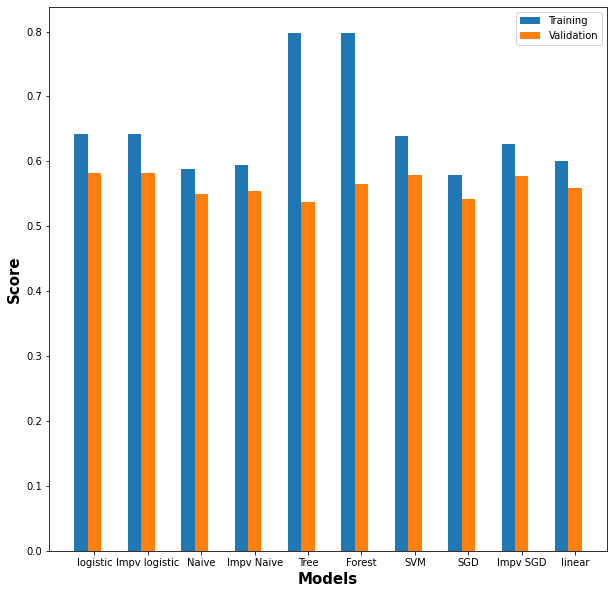

In [ ]:
barWidth = 0.25

br1 = np.arange(len(modelNames))
br2 = [x + barWidth for x in br1]

plt.figure(figsize=(10, 10))
plt.bar(br1, trainingScores, label ='Training', width = barWidth)
plt.bar(br2, valScores, label ='Validation', width = barWidth)


# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(modelNames))], ['logistic', 'Impv logistic', 'Naive', 'Impv Naive', 'Tree', 'Forest', 'SVM', 'SGD', 'Impv SGD', 'linear'])
 
plt.legend()
plt.show()

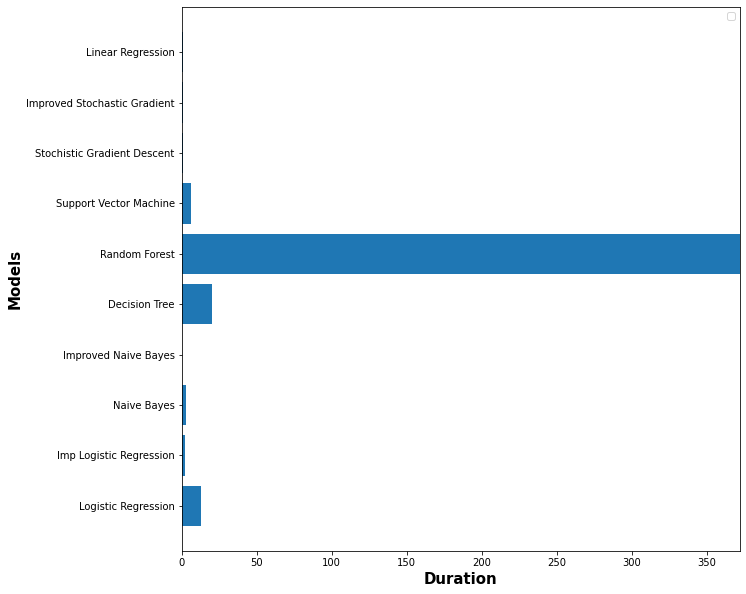

In [ ]:
plt.figure(figsize=(10, 10))
plt.barh(modelNames,  durations)

# Adding Xticks
plt.xlabel('Duration', fontweight ='bold', fontsize = 15)
plt.ylabel('Models', fontweight ='bold', fontsize = 15)
plt.xlim(right = max(durations)//2)

plt.legend()
plt.show()

**Comparing each model**

In [ ]:
#Sorting the model based on the Training Score
sorted(score.keys(), key=lambda x: score[x][0], reverse=True)

['Decision Tree',
 'Random Forest',
 'Imp Logistic Regression',
 'Logistic Regression',
 'Support Vector Machine',
 'Improved Stochastic Gradient',
 'Linear Regression',
 'Improved Naive Bayes',
 'Naive Bayes',
 'Stochistic Gradient Descent']

Comparing the training accuracy, Random Forest and Decision performed best with a score of approx 0.79 whereas SGD and Naive Bayes performed worst.

In [ ]:
#Sorting the model based on the Validation Score
sorted(score.keys(), key=lambda x: score[x][1], reverse=True)

['Imp Logistic Regression',
 'Logistic Regression',
 'Support Vector Machine',
 'Improved Stochastic Gradient',
 'Random Forest',
 'Linear Regression',
 'Improved Naive Bayes',
 'Naive Bayes',
 'Stochistic Gradient Descent',
 'Decision Tree']

Comparing the validation accuracy, Logistic regression and SVM performed best with a score of approx 0.58 whereas Decision Tree, SGD and Naive Bayes performed worst.

In [ ]:
#Sorting the model based on the running time
sorted(duration.keys(), key=lambda x: score[x])

['Stochistic Gradient Descent',
 'Naive Bayes',
 'Improved Naive Bayes',
 'Linear Regression',
 'Improved Stochastic Gradient',
 'Support Vector Machine',
 'Logistic Regression',
 'Imp Logistic Regression',
 'Decision Tree',
 'Random Forest']

Comparing the training time, SGD and Naive bayes are the fastest to train whereas Decision Tree, and Random Forest being the slowest.

**Summary** 

* Even though Decision tree has a better training accuracy, its validation score is worst hinting of a possible 'overfitting'. Same goes for Random Forest even though it performed better than Decision Tree. Both the model are costlier as running time constructing a tree is huge and as random forest required to construct multiple tree hence the running time of random forest is in average a 100 times to that of the other model and 1000 times to SGD.
* SGD has the 2nd worst validation score, showing similar trend as of training score and so is the worst performing model in terms of score but is quick as it has the lowest running time. Same can be said for Naive Bayes.
* Logistic regressiion and its improved counter part performed the best on validation dataset. And even though logistic regression has the high running time below decision tree and random forest, by improving the model, the running time dropped more than 75%.
* SVM and Improved SGD shows good result as it score little less than that of logistic regression and at the same time has lower running time.

**Improved Logistic Regression** has the best validation Score

###Submitting the test data result

In [ ]:
impLogisticReg.fit(train_inputs, train_targets)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=20, random_state=23, solver='sag')

In [ ]:
test_preds = impLogisticReg.predict(test_input)

In [ ]:
sub_df.head()

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


In [ ]:
sub_df.Sentiment = test_preds

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [ ]:
sub_df.to_csv('submission.csv', index=None)

In [ ]:
!head submission.csv

PhraseId,Sentiment
156061,3
156062,3
156063,2
156064,3
156065,2
156066,3
156067,3
156068,2
156069,3


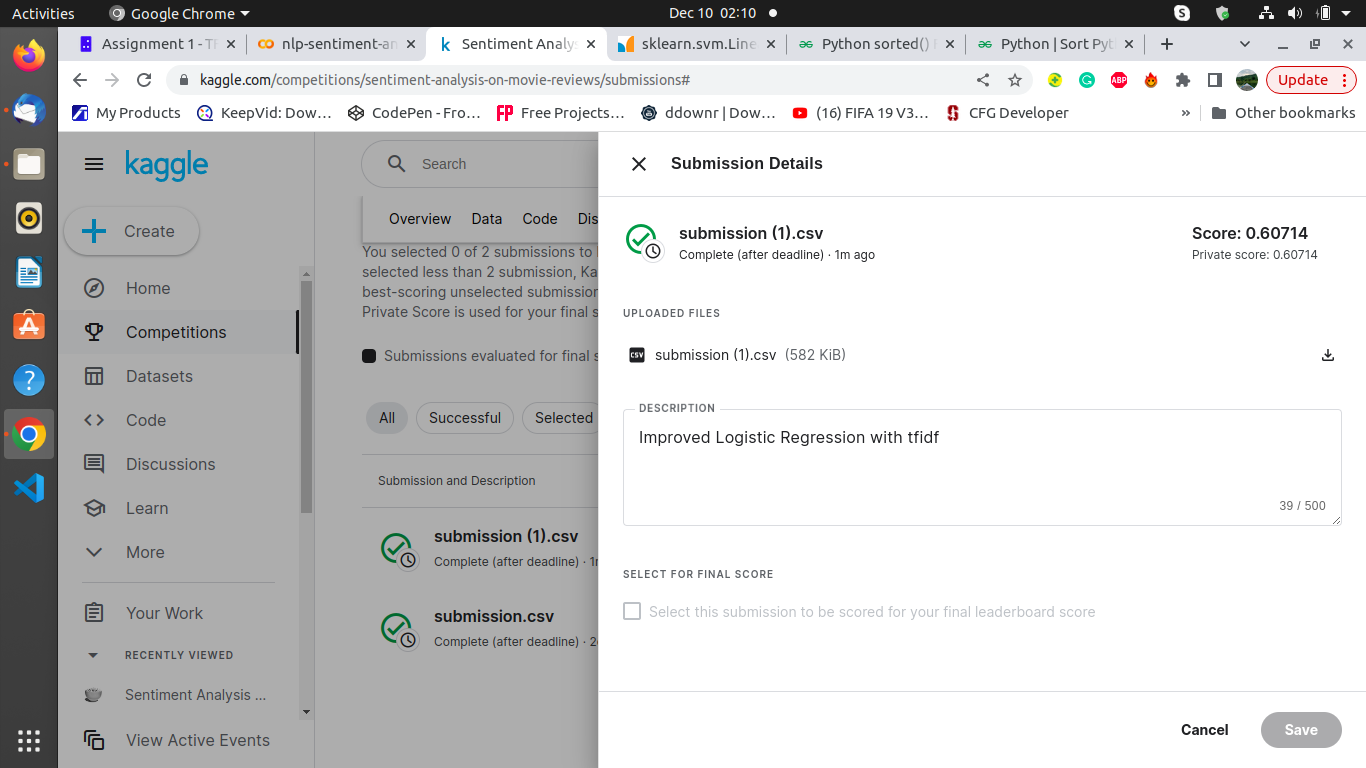

##Future Work

Future work:
- Try more machine learning models
- Try configuring CountVectorizer differently
- Try approaches other than bag of words
